<html lang="es-es">
<head>
<meta content="text/html; charset=UTF-8" http-equiv="content-type">
<title>DATAPAK_Jupyter.html</title>
</head>
<body style="color: black; background-color: white;" alink="#000099"
link="#000099" vlink="#990099">
<br>
<div
style="text-align: center; font-family: Helvetica,Arial,sans-serif;"><img
style="width: 903px; height: 200px;"
alt="CAJAMAR DATATHON UNIVERSITYHACK 2017"
src="https://raw.githubusercontent.com/raul-pingarron/CAJAMAR-DATATHON-2017/master/logo-datathon2017.png"><br>
<big>Equipo <span style="font-weight: bold;">DATAPAK</span> <br>
Lorena Prieto, Luis Nadal, Raul Pingarr&oacute;n<br>
Universidad Europea de Madrid<br>
<br>
Reto: Microsoft Predictive Modelling</big><br>
<div style="text-align: left;"><big><span style="font-weight: bold;">INTRODUCCION:</span></big><br>
<span style="font-family: Helvetica;"><br>
El equipo DATAPAK de la Universidad Europea de Madrid ha afrontado el
desaf&iacute;o generando un motor de recomendaci&oacute;n de Market Basket Analysis
que es capaz de predecir con extremada exactitud cu&aacute;l ser&aacute; el pr&oacute;ximo
producto financiero a contratar por el cliente.<br>
<br>
A continuaci&oacute;n se presenta una serie de visualizaciones sobre el
Dataset de entrega del reto. <br>
El Dataset contiene 258.989 registros con dos variables: <span
style="font-family: Courier;">ID_Customer</span> y <span
style="font-family: Courier;">Cod_Prod</span>
de manera que cada registro identifica a un cliente y al producto
sugerido por el modelo generado a trav&eacute;s del motor de recomendaci&oacute;n
construido.<br>
<br>
Para construir el motor de recomendaci&oacute;n se ha utilizado Microsoft
Azure Machine Learning Studio, siendo el esquema del experimento el
siguiente:<br>
<br>
</span>
<div style="text-align: center;"><span style="font-family: Helvetica;"><img
style="width: 1122px; height: 703px;" alt=""
src="https://raw.githubusercontent.com/raul-pingarron/CAJAMAR-DATATHON-2017/master/MSFT_AML_DATAPAK.jpg"></span><br
style="font-family: Helvetica;">
<span style="font-family: Helvetica;"></span></div>
<br style="font-family: Helvetica;">
<br>
El algoritmo utilizado (MatchBox) es una aproximaci&oacute;n h&iacute;brida
(Content-Based y Collaborative-Filtering) ya que es capaz de utilizar
caracter&iacute;sticas de los usuarios y de los elementos.<br>
Matchbox hace uso de la informaci&oacute;n de contenido en forma de metadatos
de usuario y elemento en combinaci&oacute;n con la informaci&oacute;n de filtrado
colaborativo del comportamiento del usuario anterior con el fin de
predecir el valor de un elemento para un usuario. Los usuarios y
elementos est&aacute;n representados por vectores de caracter&iacute;sticas que se
mapean en un "atributo de espacio" de baja dimensi&oacute;n en el que la
similitud se mide en tÃ©rminos de productos internos. <br>
El modelo puede ser entrenado a partir de diferentes tipos de
retroalimentaci&oacute;n para aprender las preferencias de los elementos de
usuario. En concreto se ha utilizado la alimentaci&oacute;n basada en un
conjunto de clasificaciones ordinales a escala individual. <br>
<br>
El Paper que detalla el funcionamiento del algoritmo se puede consultar
en la siguiente URL:<br>
<a href="https://www.microsoft.com/en-us/research/wp-content/uploads/2009/01/www09.pdf"
target="_blank">https://www.microsoft.com/en-us/research/wp-content/uploads/2009/01/www09.pdf</a><span
style="font-family: Helvetica;"><br>
<br>
<br>
</div>
</div>
</body>
</html>

<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Haz Click para ocultar/mostrar el codigo."></form>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from azureml import Workspace
wsE = Workspace()
experimentoE = wsE.experiments['da90d0d7ab424e259e80c9b9e83ce465.f-id.f6f65ca578414717a0ddf98eafcfde13']
dsE = experimentoE.get_intermediate_dataset(
    node_id='62c23b0d-daf0-44c4-8716-7c96c75e3e1e-1602',
    port_name='Results dataset',
    data_type_id='GenericCSV'
)
frame_entrada = dsE.to_dataframe()
wsS = Workspace()
experimentoS = wsS.experiments['da90d0d7ab424e259e80c9b9e83ce465.f-id.cdeac9d99af74c209418872b569666cf']
dsS = experimentoS.get_intermediate_dataset(
    node_id='7f42dd1b-20ca-4806-b1f9-7ffa44bf2cc4-236',
    port_name='Results dataset',
    data_type_id='GenericCSV'
)
frame_salida = dsS.to_dataframe()

In [3]:
%matplotlib inline

<html>
<head>
<meta content="text/html; charset=UTF-8" http-equiv="content-type">
<title>DATAPAK_Jupyter.html</title>
</head>
<body style="color: black; background-color: white;" alink="#000099"
link="#000099" vlink="#990099">
<div
style="text-align: center; font-family: Helvetica,Arial,sans-serif;">
<div style="text-align: left;"><big><span style="font-weight: bold;">VISUALIZACION
del DATASET de TEST:</span></big><br>
<span style="font-family: Helvetica;">
Vamos a analizar el dataset de TEST sobre el que hemos aplicado el
modelo de predicci&oacute;n (que hemos obtenido gracias a los datos del
dataset TRAIN).
</span></div>
</div>
<hr style="width: 100%; height: 2px;"><span style="font-family: Helvetica;"><br>
</span>
</body>
</html>

El numero de registros del dataset de TEST es de 1147687 

La variable socio-demografica que mas se repite es = 4


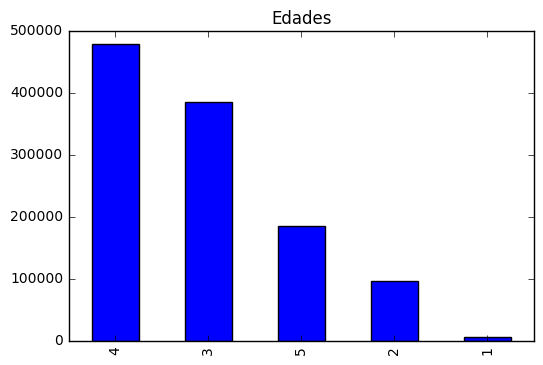

In [4]:
num_registros_entrada=frame_entrada.shape[0]
print ("El numero de registros del dataset de TEST es de",num_registros_entrada,"\n")
frameKE1 = frame_entrada['Socio_Demo_01'].value_counts(sort=True, ascending=False)
listaKE1 = frameKE1.index
print ("La variable socio-demografica que mas se repite es =", listaKE1[0])
plotea1 = frameKE1.plot(kind='bar',title="Edades")

In [5]:
print ("Donde 5 = <65a, 4 = 45-65a, 3 = 45-30a, 2 = 30-18a, 1 = >18a")

Donde 5 = <65a, 4 = 45-65a, 3 = 45-30a, 2 = 30-18a, 1 = >18a


La variable economico-demografica que mas se repite es = 2


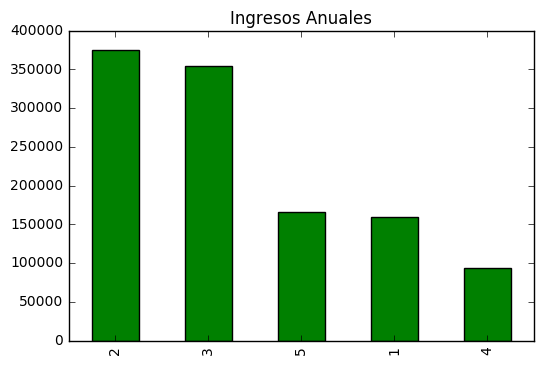

In [6]:
frameKE2 = frame_entrada['Socio_Demo_03'].value_counts(sort=True, ascending=False)
listaKE2 = frameKE2.index
print ("La variable economico-demografica que mas se repite es =", listaKE2[0])
plotea2 = frameKE2.plot(kind='bar',title="Ingresos Anuales", color=['g'])

In [7]:
print ("Donde 5 = +32.000â¬/a, 4 = 24.000-32.000â¬/a, 3 = 24.000-12.000â¬/a, 2 = 6.000-12.000â¬/a , 1 = >6.000â¬/a")

Donde 5 = +32.000â¬/a, 4 = 24.000-32.000â¬/a, 3 = 24.000-12.000â¬/a, 2 = 6.000-12.000â¬/a , 1 = >6.000â¬/a


La variable demografica que mas se repite es = 1


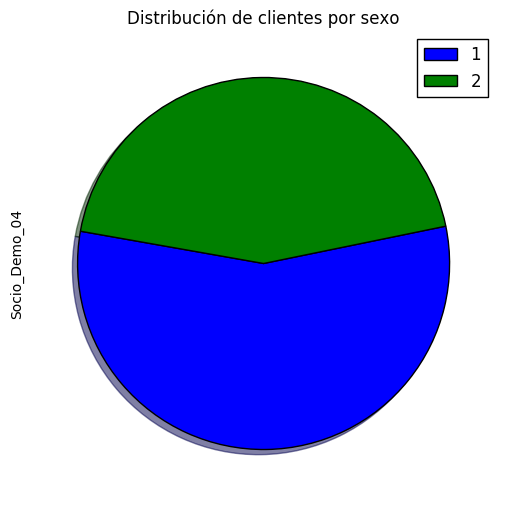

In [8]:
frameKE3 = frame_entrada['Socio_Demo_04'].value_counts(sort=True, ascending=False)
listaKE3 = frameKE3.index
print ("La variable demografica que mas se repite es =", listaKE3[0])
plotea3 = frameKE3.plot.pie(figsize=(6, 6), title="DistribuciÃ³n de clientes por sexo", legend=True, labels=None, startangle=170, shadow=True)

In [9]:
print ("Donde 1 = Hombre, 2 =Mujer")

Donde 1 = Hombre, 2 =Mujer


<html>
<head>
<meta content="text/html; charset=UTF-8" http-equiv="content-type">
<title>DATAPAK_Jupyter.html</title>
</head>
<body style="color: black; background-color: white;" alink="#000099"
link="#000099" vlink="#990099">
<div
style="text-align: center; font-family: Helvetica,Arial,sans-serif;">
<div style="text-align: left;"><big><span style="font-weight: bold;">VISUALIZACION
del DATASET de ENTREGA:</span></big><br>
<span style="font-family: Helvetica;">
Vamos a visualizar algunos de los datos mas relevantes del dataset de
entrega, resultado de aplicar nuestro modelo de predicci&oacute;n.<br>
</span>
<hr style="width: 100%; height: 2px;"><span
style="font-family: Helvetica;">
</span></div>
</div>
</body>
</html>

In [10]:
# Comprobamos el numero de registros dataset entrega (salida):
num_registros=frame_salida.shape[0]
print ("El numero de registros del dataset de entrega es de",num_registros)

El numero de registros del dataset de entrega es de 258989


In [11]:
frame2 = frame_salida['Cod_Prod'].value_counts(sort=True, ascending=False)
listaS = frame2.index
print ("El producto mas recomendado es el Cod_Prod =", listaS[0])

El producto mas recomendado es el Cod_Prod = 2301


In [12]:
print ("La lista con las recomendaciones por producto es la siguiente:")
tablaS = pd.DataFrame(frame_salida['Cod_Prod'].value_counts().reset_index())
tablaS.columns = ['Producto', 'No Recomendaciones']
print(tablaS)

La lista con las recomendaciones por producto es la siguiente:
    Producto  No Recomendaciones
0       2301              111828
1       9991               26853
2       9993               16403
3       2102               13405
4        706               12175
5        707               11592
6        704               11176
7       9992                9315
8       1022                8436
9       1017                7293
10       503                6631
11      1011                5393
12      2204                4555
13      2702                4076
14       702                3920
15      2106                2069
16      2201                1475
17      2707                1327
18      2601                 451
19      2205                 277
20       201                 134
21      1309                  84
22      1306                  52
23      1307                  31
24       301                  26
25      2103                  12


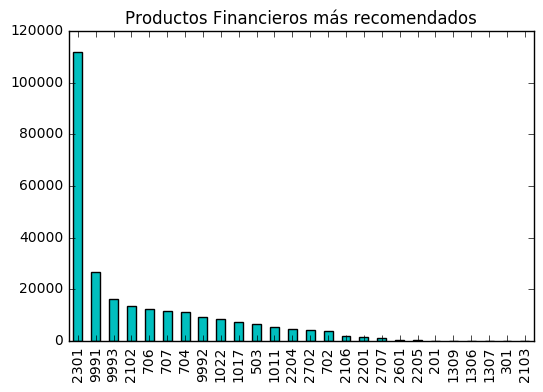

In [13]:
frame3 = frame_salida['Cod_Prod'].value_counts()
my_plot = frame3.plot(kind='bar',title="Productos Financieros mÃ¡s recomendados", color=['c'])

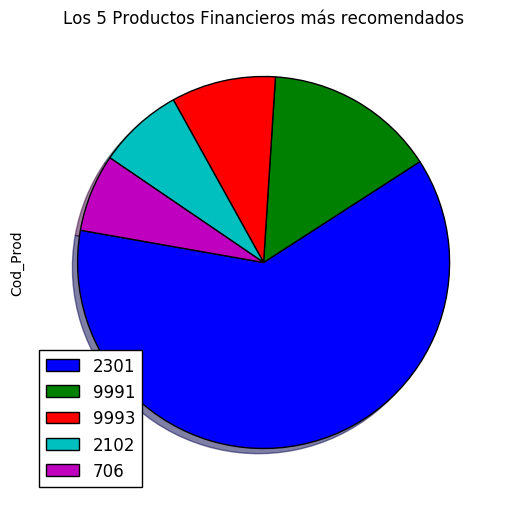

In [14]:
frame4 = frame3.head(5)
frame4.plot.pie(figsize=(6, 6), title="Los 5 Productos Financieros mÃ¡s recomendados", legend=True, labels=None, startangle=170, shadow=True)